**Exploritory Data Analysis of Hospital Readmissions and Home Health Care Part II***
***
After my initial EDA and story telling review, I concluded that more observations may significantly alter my initial findings.<br>
As such, the data was recleaned to contain all observations for hospital readmissions and home health care agency ratings.<br>
These two dataframes will be pulled in and explored to see what matches my initial findings, and what does not. 

In [1]:
# Importing All the Essential Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Making My Plots Pretty
sns.set()

In [3]:
# Adding Scatterplot Program from Part 1
def scatterme(x,y):
    """This function will take in two dataframe columns you want to create a scatter plot for and create a scatter plot
    with a line of best fit.  The function will also compute the pearson correlation coefficient and add it to the chart"""
    
    # Initializing Text Axes
    f=plt.figure()
    ax = f.add_subplot(111)
    
    # Plots Initial Scatter Plot
    _ = plt.scatter(x,y,color='green')
    
    # Finds Line of Best Fit and Overlays It
    a,b=np.polyfit(x,y,1)
    x2 = np.array([np.min(x),np.max(x)])
    y2 = a*x2+b
    _ = plt.plot(x2,y2, color = 'blue')
    plt.margins(.02)
    
    # Finds Pearson Correlation Coefficient and Adds it to the Graph
    core_mat = np.corrcoef(x,y)
    pcore = core_mat[0,1]
    text = 'p: %s\n'%(round(pcore,2))
    _ = plt.text(0.1, 0.9,text, ha='center', va='center', transform = ax.transAxes)
       

In [4]:
# Importing DataFrames for EDA
readmit = pd.read_csv('Readmissions_2.csv', index_col = 0)
hhc = pd.read_csv('HHC_Agencies_Cleaned.csv', index_col = 0)
readmit.head()

,hospital_name,provider_number,state,readmission_ratio,predicted_rate,expected_rate
1,CLAY COUNTY HOSPITAL,10073,AL,0.9853,14.4,14.6
2,NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,10078,AL,1.4044,6.1,4.3
3,NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,10078,AL,0.9653,16.7,17.3
4,ATHENS LIMESTONE HOSPITAL,10079,AL,1.0204,4.3,4.2
5,ATHENS LIMESTONE HOSPITAL,10079,AL,1.0616,17.0,16.0


In [5]:
hhc.head()

,state,cms_number,name,nursing_care,physical_therapy,occupational_therapy,pathology_services,medical_soc_services,home_health_aid,star_rating,...,move_buff,in_out_bed_buff,bathing_buff,move_pain_debuff,breathing_buff,oral_rx_buff,hospital_admit,urgent_noadmit,readmit_expectation,er_admit_expectation
0,AL,17009,ALACARE HOME HEALTH & HOSPICE,True,True,True,True,True,True,4.0,...,79.4,75.4,83.5,85.9,81.3,72.4,18.3,11.4,1,1
1,AL,17013,KINDRED AT HOME,True,True,True,False,False,True,4.0,...,77.6,71.4,80.3,83.6,79.3,59.9,15.5,15.1,2,1
2,AL,17014,AMEDISYS HOME HEALTH,True,True,True,True,True,True,4.0,...,81.3,72.8,82.1,78.0,85.7,68.5,18.9,12.1,2,2
3,AL,17016,SOUTHEAST ALABAMA HOMECARE,True,True,True,True,True,False,5.0,...,85.8,79.0,87.9,91.5,87.2,80.6,16.9,11.9,2,2
4,AL,17018,KINDRED AT HOME,True,True,True,True,True,True,4.0,...,82.8,73.9,85.2,80.8,85.0,66.0,22.2,10.2,1,2


***
Now that we've imported the data.  I would like to take a look at some histograms.<br>
In particular I would like to review the resubmission ratios and star ratings, similar to what was done in Part I.

In [6]:
# Compute Bins for Each Dataframe

r_data = len(readmit.state)
r_bins= int(np.sqrt(r_data))
hhc_data = len(hhc.state)
hhc_bins = int(np.sqrt(hhc_data))
print('Readmit Bins: ',r_bins,'\n')
print('HHC Bins: ',hhc_bins)


Readmit Bins:  120 

HHC Bins:  87


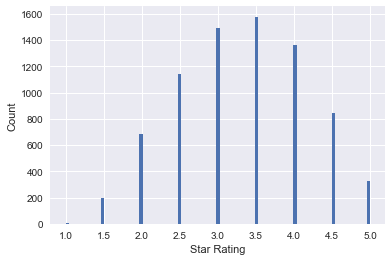

In [7]:
# Plotting Star Rating Histogram
_ = plt.hist(hhc.star_rating, bins=hhc_bins)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
plt.show()

Using the squre root rule, the bins appear to be separated apart.  I will try Matplotlib's default settings to contrast and compare.

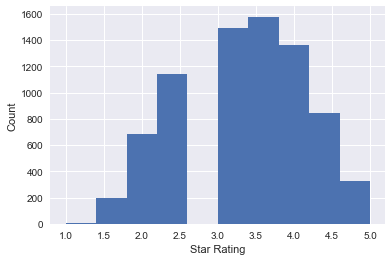

In [8]:
# Plotting Star Rating Histogram with Default Binning
_ = plt.hist(hhc.star_rating)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
plt.show()

Very interesting!  There appears to be no agencies rated between a 2.5 and a 3.  Furthermore, this histogram appears as though it might just be normally distributed.  I will run a CDF alongside the theoretical normal to confirm in my inferential statistical analysis of this data.

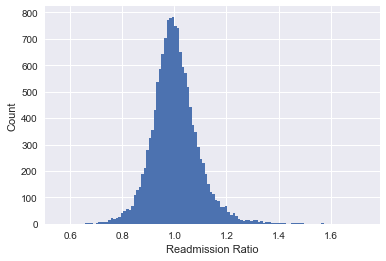

In [9]:
# Plotting Readmission Ratio Histogram
_ = plt.hist(readmit.readmission_ratio, bins=r_bins)
_ = plt.xlabel('Readmission Ratio')
_ = plt.ylabel('Count')
plt.show()

A lot more variability and yet another apparent normal distribution.  This will also be tested in my inferential stattistical analysis.  However, this is very exciting, and it is starting to look like my hypothesis that more observations were needed may be accurate. 

***
I was able to obtain additional expectation data for each home health care agency indicating how an agency met expectations for ER admissions and readmissions.  Before going comparing this data to other measures, I would like to create a couple bar charts to see the counts for each category, and how they compare to one another.

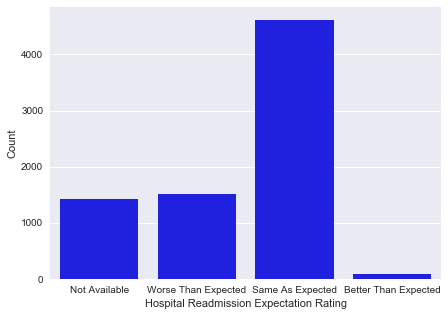

In [10]:
# Bar Chart of Readmission Expectations for HHC
plt.subplots(0,figsize=(7,5))
_ = sns.countplot(x = 'readmit_expectation', data=hhc, color = 'blue')
_ = plt.xlabel('Hospital Readmission Expectation Rating')
_ = plt.ylabel('Count')

ratings = ['Not Available', 'Worse Than Expected','Same As Expected','Better Than Expected']
plt.xticks(np.arange(4),ratings)
plt.show()

As we can see, the majority of home health care facilities rated as same as expected for hospital readmissions.<br>
It is surprising to see so few rating better than expected.

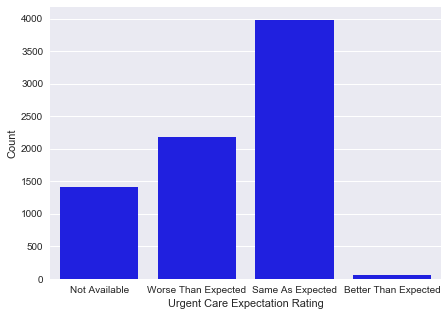

In [11]:
# Bar Chart of Readmission Expectations for HHC
plt.subplots(0,figsize=(7,5))
_ = sns.countplot(x = 'er_admit_expectation', data=hhc, color = 'blue')
_ = plt.xlabel('Urgent Care Expectation Rating')
_ = plt.ylabel('Count')
plt.xticks(np.arange(4),ratings)
plt.show()

Like the hospital readmission expectation ratings, the majority seem to be the same as expected, very few appear to be better than expected, and there is a larger amount of worse than expected as compared to hospital readmissions.

***
Each state now has multiple observations.  I would like to see how the states compare to one another by building a violin plot.

In [12]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
meltme1 = readmit.drop(['hospital_name','provider_number','predicted_rate','expected_rate'], axis=1)
melted_readmit = pd.melt(meltme1, id_vars='state')
melted_readmit.columns=('state','category','ratio')

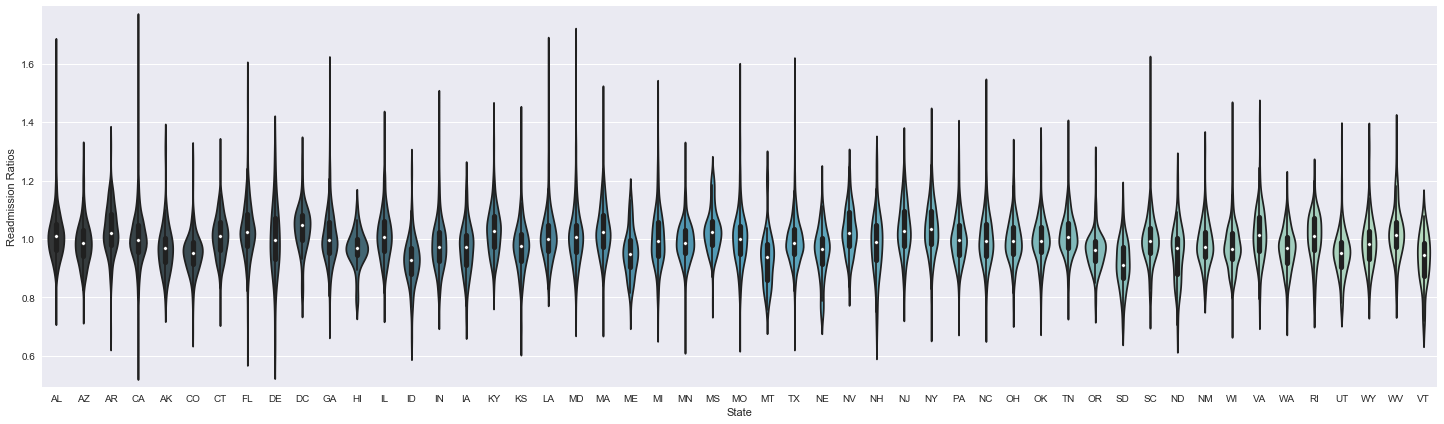

In [13]:
# Creating Violin Plot of States and their Readmission Ratios
plt.subplots(0,figsize=(25,7))
_= sns.violinplot(x='state', y='ratio', data=melted_readmit, palette='GnBu_d')
_ = plt.xlabel('State')
_ = plt.ylabel('Readmission Ratios')
plt.margins(.02)
plt.show()


There is a lot of information to unpack here.  As expected, and observed in the grouped state data, most state mean ratios hover close to 1.0.  However, there is a lot of variability between states, with a few states having the majority of their readmission ratios below the excessive readmisison ratio indicator of 1.0.<br><br>
Ultimately, this graph unlocks a slew of questions we could ask.  For example:<br>
Does state population paly a role in readmission ratio?<br>
What causes the variablility in state readmission ratios?<br>
What qualities do lower ratio states have different from higher ratio states? What do they have in common?

In [14]:
# Creating New Dataframe of Star Ratings and State by Melting Dataframe and Filtering Star Rating
melted_hhc = pd.melt(hhc, id_vars='state')
star_rate = melted_hhc[melted_hhc.variable =='star_rating']
star_rate.columns=('state','category','rating')
star_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7631 entries, 61048 to 68678
Data columns (total 3 columns):
state       7631 non-null object
category    7631 non-null object
rating      7631 non-null object
dtypes: object(3)
memory usage: 238.5+ KB


I initially had a problem creating the violin plot.  Come to find out the ratings were stored as an object and not a float.  So I coerced the data back into a float (with no data loss) and successfully plotted the violin plot.

In [15]:
dfa = star_rate['rating'].apply(pd.to_numeric, errors='coerce')
dfb = star_rate['state']
star_rate= pd.concat([dfb,dfa], axis=1)
star_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7631 entries, 61048 to 68678
Data columns (total 2 columns):
state     7631 non-null object
rating    7631 non-null float64
dtypes: float64(1), object(1)
memory usage: 178.9+ KB


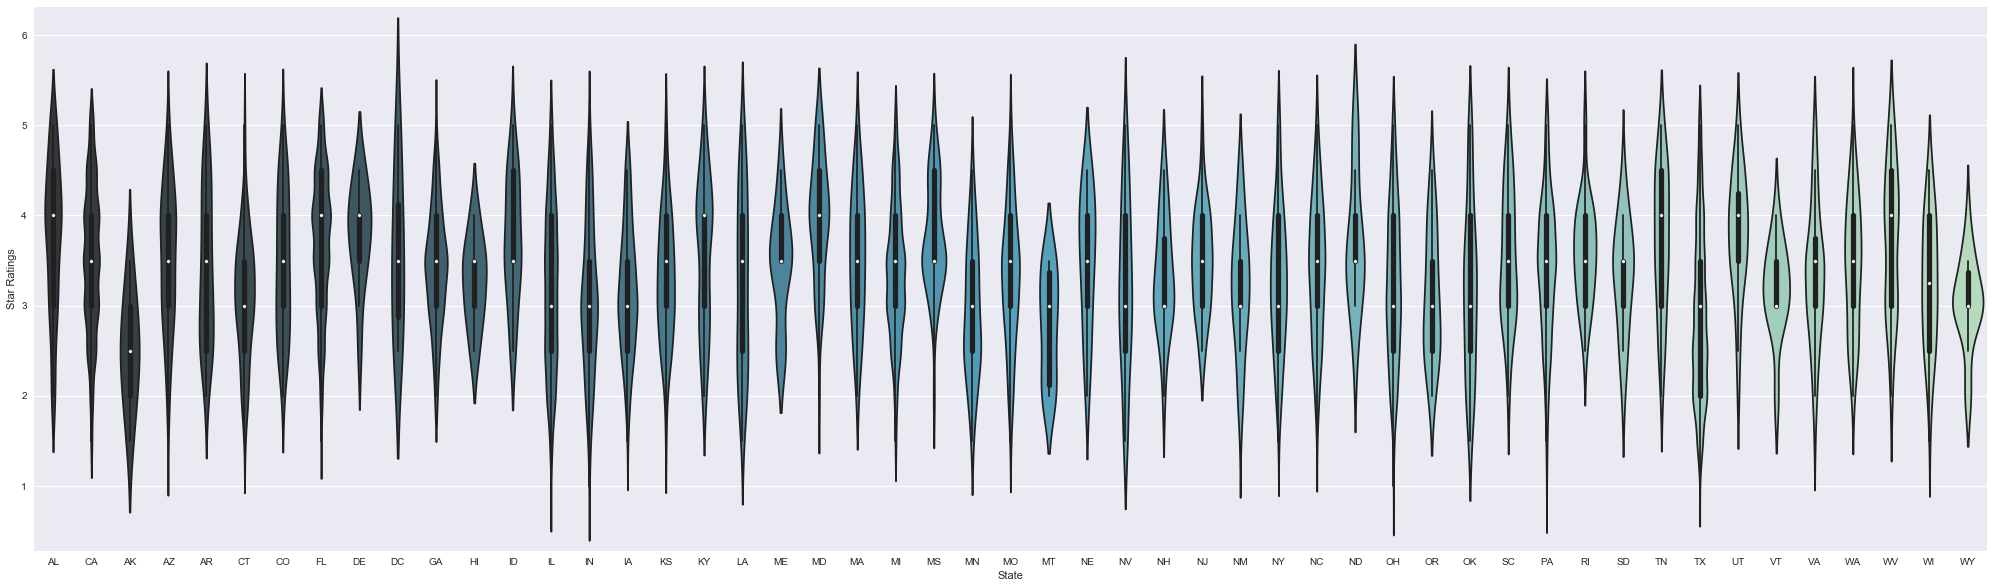

In [16]:
# Create Violin Plot of States and their Star Ratings
plt.subplots(0,figsize=(35,10))
_= sns.violinplot(x='state', y='rating', data=star_rate, palette='GnBu_d')
_ = plt.xlabel('State')
_ = plt.ylabel('Star Ratings')
plt.margins(.02)
plt.show()


Another fascinating plot!  There appears to be a lot more variability within the states overall.  At first glance it appears as though we might find a relationship between readmission ratios and star ratings this time!<br><br>
Similar to our first violin plot, we have more questions to ask.  For example:<br>
What qualities contribute to a higher star rating?<br>
How does star rating effect excessive readmissions?<br>
What qualities do higher star rated states have differnt from lower star rated states?  What do they have in common?

***
Similar to Part I, let's now take a look at the variablity of each measure by creating some box plots.

In [17]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
categories = hhc.drop(['state', 'cms_number','name','nursing_care','physical_therapy','occupational_therapy','pathology_services',
                'medical_soc_services','home_health_aid', 'star_rating','readmit_expectation','er_admit_expectation'], axis=1)
hhc_melt = pd.melt(categories)
hhc_melt.columns=('category','rating')

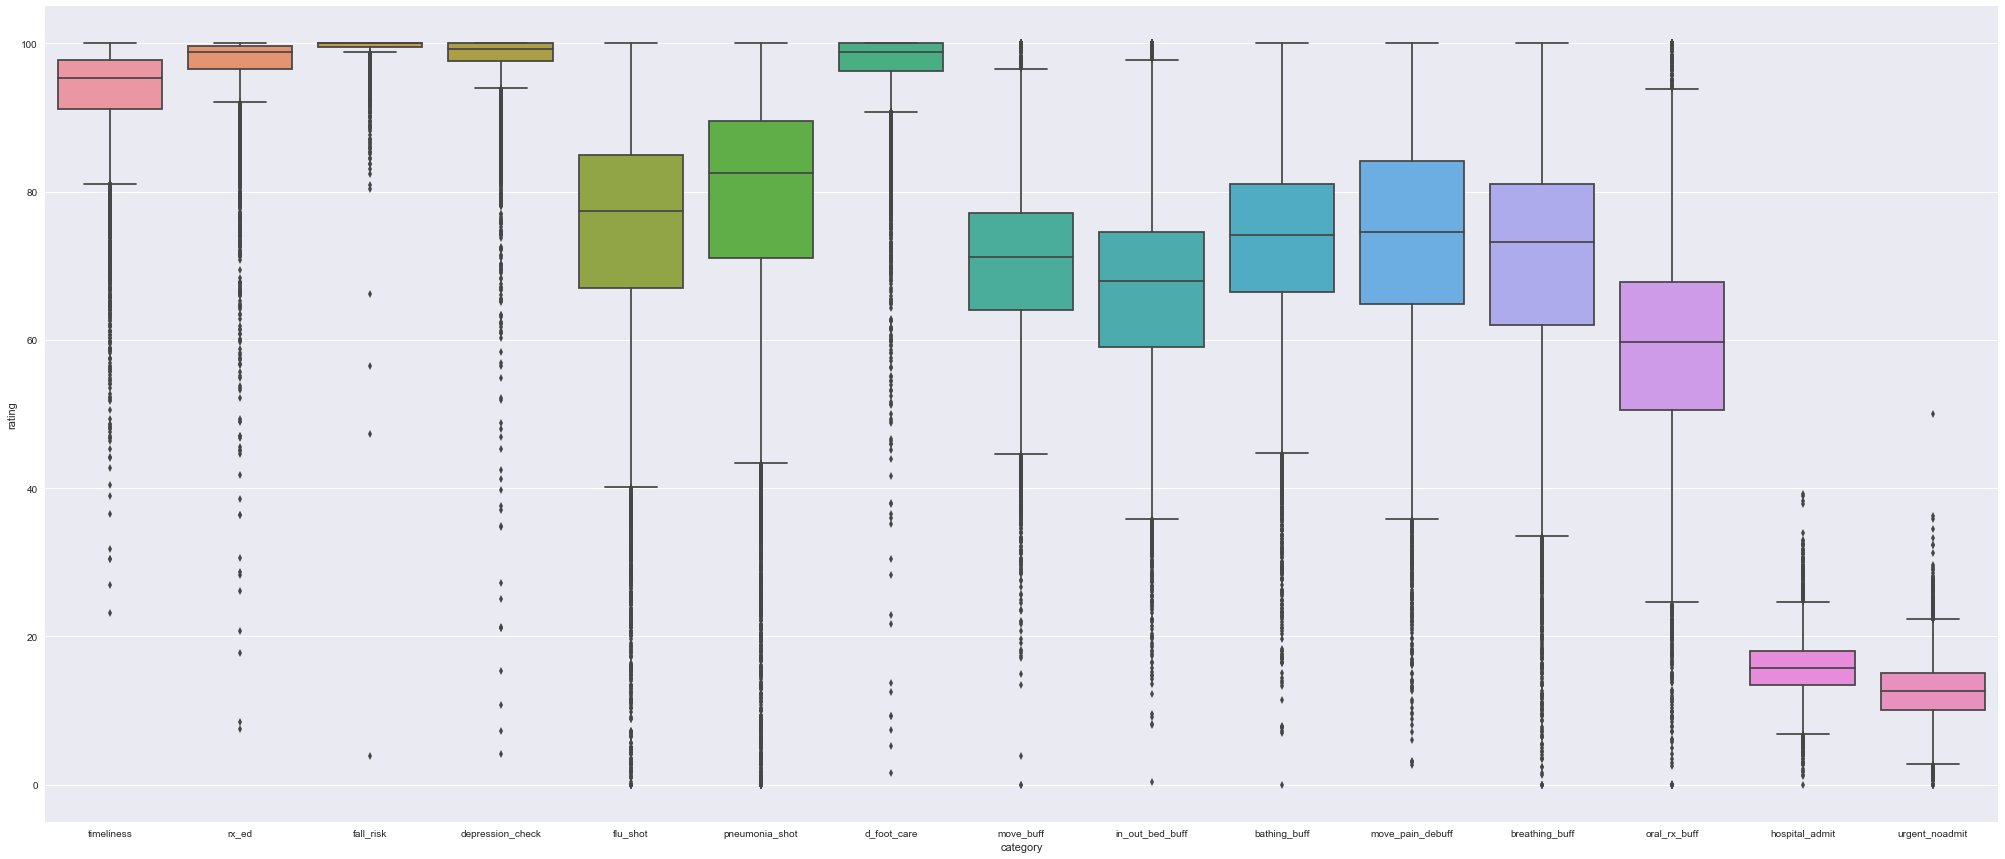

In [18]:
# Plot Box Plots for All Categories to Show Relative Variation
plt.subplots(0,figsize=(35,15))
_=sns.boxplot(x='category',y='rating',data=hhc_melt)
plt.show()

As expected, these categories have a lot more variability than the previous model.  However, there appears to be a surprisingly high amount of outliers.  After reviewing the data, there are no footnotes advising that the outliers were calculated using a different metric.  As such, for the time being, I will assume these numbers accurately reflect the data in percentage points.

***
Finally, it's time to build out all those scatter plots!  Let's see how they compare to the ones built in Part I.

After attempting to create a scatter plot of the data, I realized that x and y need the same shape.  As such, I must reduce the data in the readmit dataframe to match the data in the hhc dataframe.  I will do this via numpy's permutation feature.  This also means that I will need to graph some probability linear regressions in my inferential statistics evaluation of the data.

In [50]:
# Set a Seed for Data Reproducibility
np.random.seed(42)

# Permutate Through the Data and Create and Array that is in Equal Length to the Home Health Care Data
readmit_ran = np.random.permutation(readmit.readmission_ratio)
readmit_sample = readmit_ran[:len(hhc)]


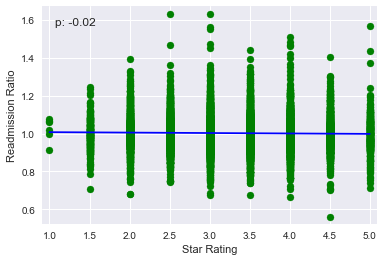

In [51]:
# Plotting Scatter Plot of Star Rating and Readmission Ratio
_ = scatterme(hhc.star_rating, readmit_sample)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

Quite surprisingly, even with high amounts of data, star rating does not appear to have any correlation with the readmission ratio.

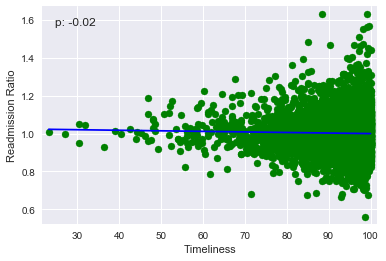

In [52]:
# Plotting Scatter Plot of Timeliness Rating and Readmission Ratio
_ = scatterme(hhc.timeliness, readmit_sample)
_ = plt.xlabel('Timeliness')
_ = plt.ylabel('Readmission Ratio')
plt.show()

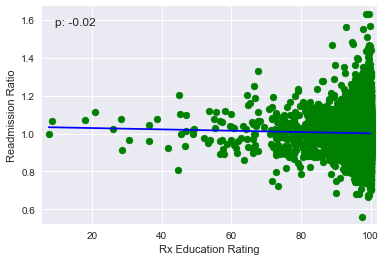

In [53]:
# Plotting Scatter Plot of Rx Education Rating and Readmission Ratio
_ = scatterme(hhc.rx_ed, readmit_sample)
_ = plt.xlabel('Rx Education Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

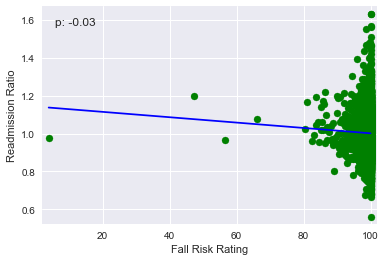

In [54]:
# Plotting Scatter Plot of Fall Risk Rating and Readmission Ratio
_ = scatterme(hhc.fall_risk, readmit_sample)
_ = plt.xlabel('Fall Risk Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

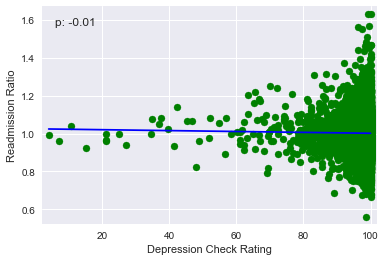

In [55]:
# Plotting Scatter Plot of Depression Check Rating and Readmission Ratio
_ = scatterme(hhc.depression_check, readmit_sample)
_ = plt.xlabel('Depression Check Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

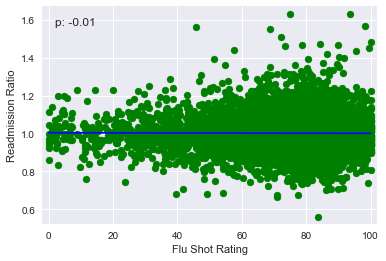

In [56]:
# Plotting Scatter Plot of Flu Shot Rating and Readmission Ratio
_ = scatterme(hhc.flu_shot, readmit_sample)
_ = plt.xlabel('Flu Shot Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

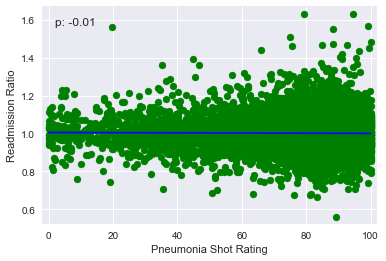

In [57]:
# Plotting Scatter Plot of Pneumonia Shot Rating and Readmission Ratio
_ = scatterme(hhc.pneumonia_shot, readmit_sample)
_ = plt.xlabel('Pneumonia Shot Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

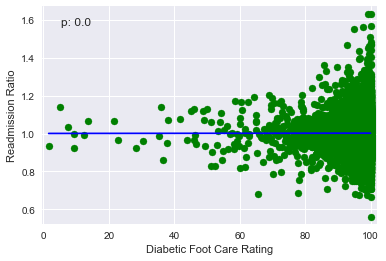

In [58]:
# Plotting Scatter Plot of Diabetic Foot Care Rating and Readmission Ratio
_ = scatterme(hhc.d_foot_care, readmit_sample)
_ = plt.xlabel('Diabetic Foot Care Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

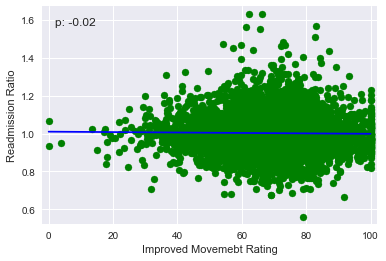

In [59]:
# Plotting Scatter Plot of Improved Movement Rating and Readmission Ratio
_ = scatterme(hhc.move_buff, readmit_sample)
_ = plt.xlabel('Improved Movemebt Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

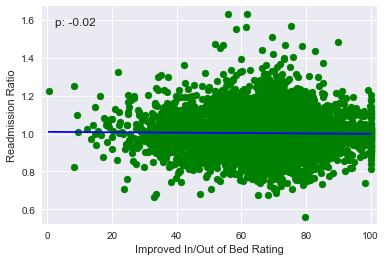

In [60]:
# Plotting Scatter Plot of Improved In/Out of Bed Rating and Readmission Ratio
_ = scatterme(hhc.in_out_bed_buff, readmit_sample)
_ = plt.xlabel('Improved In/Out of Bed Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

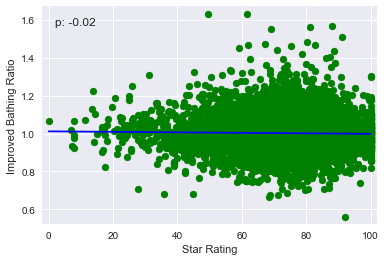

In [61]:
# Plotting Scatter Plot of Improved Bathing Rating and Readmission Ratio
_ = scatterme(hhc.bathing_buff, readmit_sample)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Improved Bathing Ratio')
plt.show()

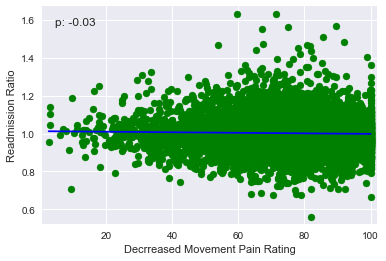

In [62]:
# Plotting Scatter Plot of Decreased Movement Pain Rating and Readmission Ratio
_ = scatterme(hhc.move_pain_debuff, readmit_sample)
_ = plt.xlabel('Decrreased Movement Pain Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

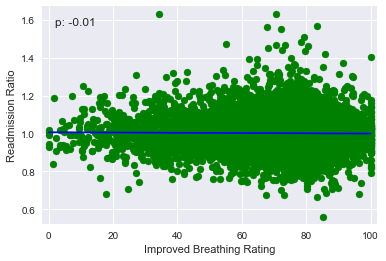

In [63]:
# Plotting Scatter Plot of Improved Breathing Rating and Readmission Ratio
_ = scatterme(hhc.breathing_buff, readmit_sample)
_ = plt.xlabel('Improved Breathing Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

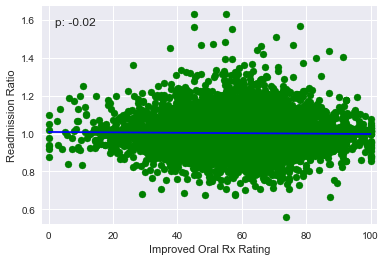

In [64]:
# Plotting Scatter Plot of Improved Oral Rx Rating and Readmission Ratio
_ = scatterme(hhc.oral_rx_buff, readmit_sample)
_ = plt.xlabel('Improved Oral Rx Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

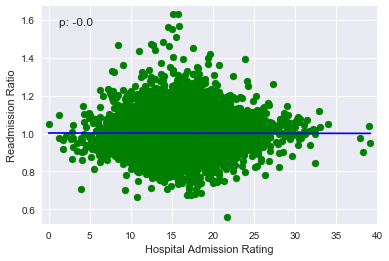

In [65]:
# Plotting Scatter Plot of Hospital Admission Rating and Readmission Ratio
_ = scatterme(hhc.hospital_admit, readmit_sample)
_ = plt.xlabel('Hospital Admission Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

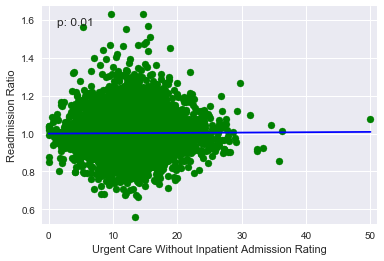

In [66]:
# Plotting Scatter Plot of Urgent Care Without Inpatient Admission Rating and Readmission Ratio
_ = scatterme(hhc.urgent_noadmit, readmit_sample)
_ = plt.xlabel('Urgent Care Without Inpatient Admission Rating')
_ = plt.ylabel('Readmission Ratio')
plt.show()

Much to my surprise, there appears to be no correlations between what the surveys measured and hospital readmission ratios.<br>
I have a few hypotheses for why this is the case:<br>
-   One: The outliers in the data have hidden any existing relationships.
-   Two: Different scales were used within each individual measure of the HHC ratings by Agency data thus obscuring any existing relationships.
-   Three:  The data is correct and the HHC measures have no impact on hospital readmission ratios


My overall gut feeling is that hypothesis one and two are the most probable.  That said, we should know more after performing some inferential statistical analysis on both EDAs.  Either way and intersting story can be crafted here.